<a href="https://colab.research.google.com/github/isaacdono/ml-studies/blob/main/unsupervised%20learning/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo Prático: Análise de Componentes Principais (PCA)

Este notebook demonstra o uso do PCA para **redução de dimensionalidade** e **visualização** de dados.

Vamos aplicar o PCA a um dataset de dígitos manuscritos, que originalmente possui 64 dimensões (pixels de uma imagem 8x8), e reduzi-lo para apenas 2 dimensões para que possamos visualizá-lo em um gráfico.
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


Formato dos dados (X): (1797, 64)
Cada amostra tem 64 features (pixels).


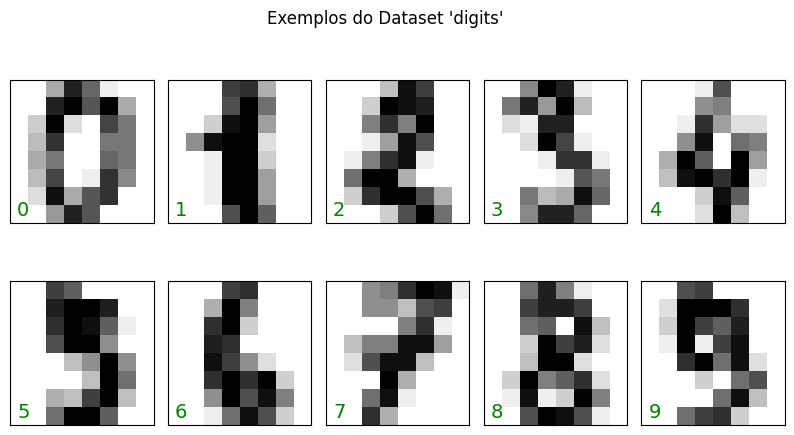

In [2]:
# O dataset 'digits' contém imagens de 8x8 pixels de dígitos manuscritos (0-9)
digits = load_digits()
X = digits.data
y = digits.target

print(f"Formato dos dados (X): {X.shape}")
print(f"Cada amostra tem {X.shape[1]} features (pixels).")

# Mostrando algumas imagens de exemplo
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green', fontsize=14)

plt.suptitle("Exemplos do Dataset 'digits'")
plt.show()


### Passo 1: Padronizar os Dados

O PCA é sensível à escala das features. Portanto, é uma boa prática padronizar os dados (média 0 e desvio padrão 1) antes de aplicar o PCA.

In [3]:
X_scaled = StandardScaler().fit_transform(X)
print("Dados padronizados com sucesso.")

Dados padronizados com sucesso.


### Passo 2: Aplicar o PCA e Analisar a Variância Explicada

Primeiro, vamos aplicar o PCA sem definir um número de componentes para ver quanta variância cada componente consegue explicar. Isso nos ajuda a decidir quantos componentes usar.

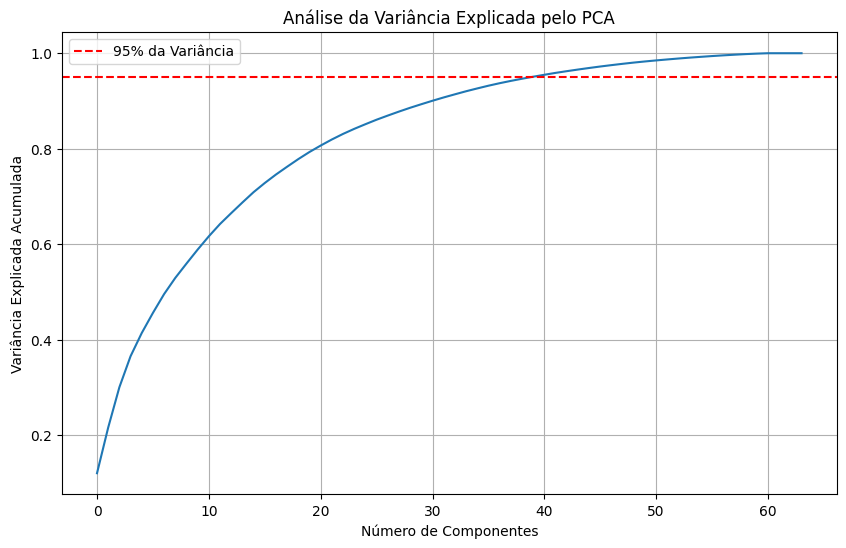

Observação: Com cerca de 30 componentes, já retemos 95% da informação original.


In [4]:
# Aplicando PCA para manter todos os componentes
pca_analysis = PCA().fit(X_scaled)

# Plotando a variância explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_analysis.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Análise da Variância Explicada pelo PCA')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% da Variância')
plt.legend()
plt.show()

print("Observação: Com cerca de 30 componentes, já retemos 95% da informação original.")

### Passo 3: Reduzir para 2 Dimensões

Agora, vamos aplicar o PCA novamente, mas desta vez especificando `n_components=2` para que possamos plotar os dados em um gráfico 2D.

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Formato dos dados original: {X_scaled.shape}")
print(f"Formato dos dados após PCA: {X_pca.shape}")


Formato dos dados original: (1797, 64)
Formato dos dados após PCA: (1797, 2)


### Passo 4: Visualizar os Componentes Principais

Vamos criar um `DataFrame` com os dois componentes principais e os rótulos originais para facilitar a plotagem. O gráfico mostrará como o PCA conseguiu agrupar os diferentes dígitos mesmo em um espaço de apenas 2 dimensões.

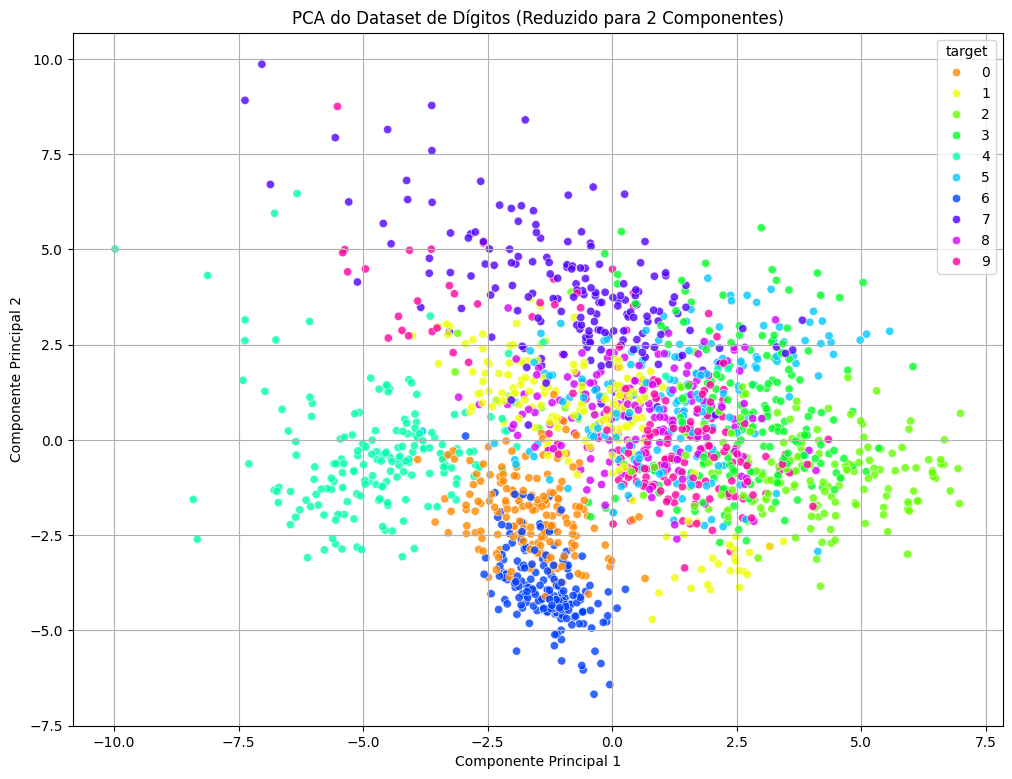

In [7]:
# Criando um DataFrame para a visualização
df_pca = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
df_pca['target'] = y

# Plotando o resultado
plt.figure(figsize=(12, 9))
sns.scatterplot(
    x="Componente Principal 1", y="Componente Principal 2",
    hue="target",
    palette=sns.color_palette("hsv", 10),
    data=df_pca,
    legend="full",
    alpha=0.8
)

plt.title('PCA do Dataset de Dígitos (Reduzido para 2 Componentes)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

**Conclusão:** Como podemos ver, os dados de 64 dimensões foram projetados em um plano 2D. Mesmo com essa drástica redução, os clusters correspondentes a cada dígito estão, em sua maioria, bem definidos e separados. Isso mostra o poder do PCA em encontrar as direções de maior variância nos dados.